## Import libraries

In [179]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

traind=open(r"C:\Users\NUTHETI SRI LAASYA\Documents\Datasets\Titanic\train.csv")
testd=open(r"C:\Users\NUTHETI SRI LAASYA\Documents\Datasets\Titanic\test.csv")

train=pd.read_csv(traind)
test=pd.read_csv(testd)
name=train.Name
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
train.shape

(891, 12)

In [128]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Cleaning Data

In [129]:
train = train.drop('Name', axis=1,)
train = train.drop('Ticket', axis=1,)
train = train.drop('Fare', axis=1,)
train = train.drop('Cabin', axis=1,)

In [130]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [131]:
train['Family'] = train['SibSp'] + train['Parch'] + 1

In [132]:
train = train.drop('SibSp', axis=1,)
train = train.drop('Parch', axis=1,)

In [133]:
train["Age"] = train["Age"].astype(np.float16)
train["Age"] = (train["Age"].fillna(train["Age"].median()))
embarkedmode=(train["Embarked"].mode())
train["Embarked"] = train["Embarked"].fillna("S")

In [134]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
Family         0
dtype: int64

In [135]:
#train["Age"].describe()
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float16

In [136]:
train["Adult"] = 0

In [137]:
train["Adult"][train["Age"] >= 18] = 1

C:\Users\NUTHETI SRI LAASYA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
print ("Passengers more than 18 yrs old: ",str(len(train[train["Age"] >= 18])))
print ("Number of Adults: ",str(len(train[train["Adult"] >= 1])))

Passengers more than 18 yrs old:  778
Number of Adults:  778


In [139]:
train = train.drop('Age', axis=1,)

## Data Visualization

### Figure depicting co-relation between all the features

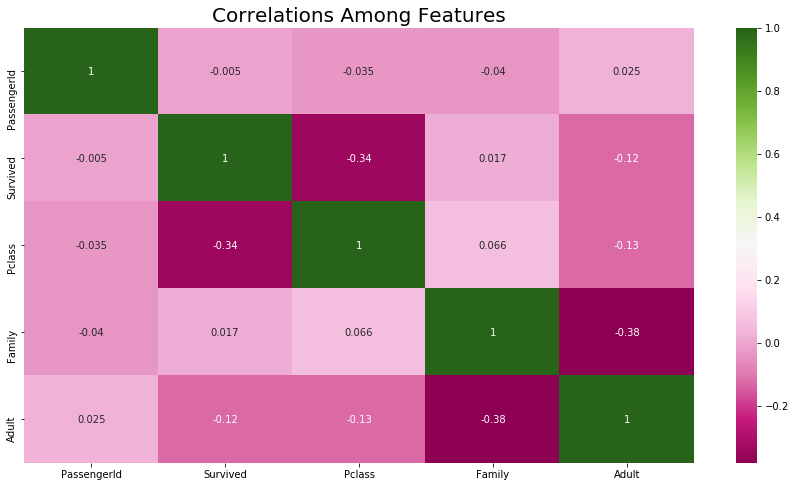

In [140]:
plt.subplots(figsize = (15,8))
sns.heatmap(train.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

In [141]:
def visualize (parameter1, parameter2):
    ref = train[[parameter1, parameter2, 'PassengerId']]
    ref_p = ref.pivot_table(index=[parameter1], columns=[parameter2], aggfunc=np.size, fill_value=0)
    
    p_chart = ref_p.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
    
    return ref_p
    return p_chart

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

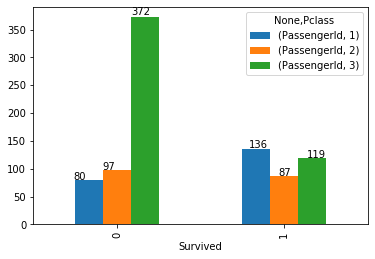

In [142]:
visualize("Survived","Pclass")

PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

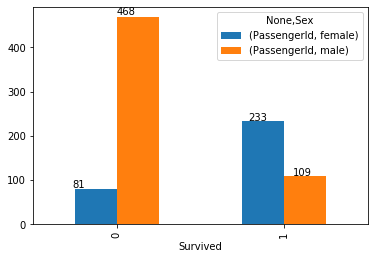

In [143]:
visualize("Survived","Sex")

PassengerId         
Embarked           C   Q    S
Survived                     
0                 75  47  427
1                 93  30  219

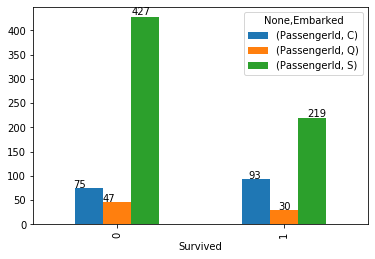

In [144]:
visualize("Survived","Embarked")

PassengerId                             
Family            1   2   3   4   5   6  7  8  11
Survived                                         
0                374  72  43   8  12  19  8  6  7
1                163  89  59  21   3   3  4  0  0

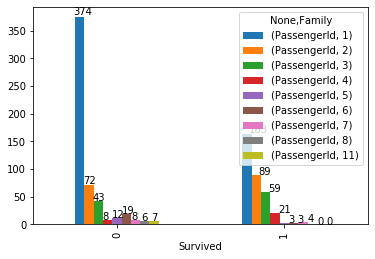

In [145]:
visualize("Survived","Family")

PassengerId     
Adult              0    1
Survived                 
0                 52  497
1                 61  281

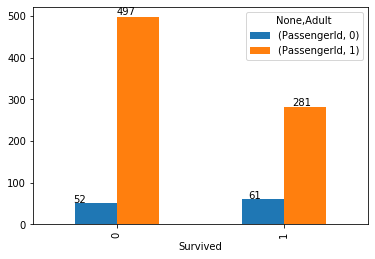

In [146]:
visualize("Survived","Adult")

##### Feel free to represent and visualize the obtained data as you like in other ways!

## Finding features which are to be considered using SelectKBest

In [147]:
dataframe = train.filter(['Pclass','Sex','Embarked','Family','Adult'], axis=1)

df = dataframe

In [148]:
dataframe1 = train['Survived']

df_1 = dataframe1

In [149]:
df["Embarked"][train["Embarked"] == "S"] = 1
df["Embarked"][train["Embarked"] == "C"] = 2
df["Embarked"][train["Embarked"] == "Q"] = 3

C:\Users\NUTHETI SRI LAASYA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\NUTHETI SRI LAASYA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\NUTHETI SRI LAASYA\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is s

In [150]:
df["Sex"][train["Sex"] == "male"] = 1
df["Sex"][train["Sex"] == "female"] = 2

C:\Users\NUTHETI SRI LAASYA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\NUTHETI SRI LAASYA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [151]:
select = SelectKBest(f_classif, k='all')
fit = select.fit(df, df_1)
score = fit.scores_.round(3)
values = -np.log10(fit.pvalues_).round(3)

In [152]:
features = list(df.columns.values)
features_final = select.get_support([fit])
features_final

array([0, 1, 2, 3, 4], dtype=int64)

In [153]:
temp = [ ]

for i in features_final:
    temp.append({'Feature':features[i], 'Value':values[i], 'Score': score[i]  })
    
selected = pd.DataFrame(temp)

In [154]:
selected = selected.sort_values(by='Score', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [155]:
selected = selected.set_index('Feature')

In [156]:
selected

,Value,Score
Feature,,
Sex,68.852,372.406
Pclass,24.596,115.031
Adult,3.594,13.485
Embarked,2.851,10.259
Family,0.208,0.246


#### From the values above, we can just consider the values- Sex, Pclass, and Adult

In [157]:
df = df.drop('Embarked', axis=1,)
df = df.drop('Family', axis=1,)

## Training and testing the model

In [158]:
ftrain, ftest, ltrain, ltest = train_test_split(df, df_1, test_size=0.3, random_state=42)

In [159]:
ftrain.shape

(623, 3)

In [160]:
ftest.shape

(268, 3)

In [161]:
ltrain.shape

(623,)

In [162]:
ltest.shape

(268,)

In [163]:
ftrain["Sex"] = ftrain["Sex"].astype(np.int64)

C:\Users\NUTHETI SRI LAASYA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [164]:
ltrain.dtypes

dtype('int64')

In [165]:
kweights = ['uniform','distance']
krange = list(range(1,10))
scores = {}
scores_list = []
for k in krange:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn.fit(ftrain, ltrain)
    lpred=knn.predict(ftest)
    scores[k]= metrics.accuracy_score(ltest, lpred)
    scores_list.append(metrics.accuracy_score(ltest, lpred))

In [166]:
scores_list

[0.7910447761194029,
 0.7873134328358209,
 0.7910447761194029,
 0.7723880597014925,
 0.7835820895522388,
 0.7761194029850746,
 0.7761194029850746,
 0.7761194029850746,
 0.7761194029850746]

In [167]:
scores

{1: 0.7910447761194029,
 2: 0.7873134328358209,
 3: 0.7910447761194029,
 4: 0.7723880597014925,
 5: 0.7835820895522388,
 6: 0.7761194029850746,
 7: 0.7761194029850746,
 8: 0.7761194029850746,
 9: 0.7761194029850746}